## TP3: Un peu d'analyse de données

On va faire un peu d'analyse de données, avec ou sans numpy et ses matrices.

Au passage, on va voir comment faire un peu de visualisation en Python, en utilisant le module
matplotlib (librairie en plus, mais disponible avec tous les outils scientifiques)

La commande essentielle, plot, prend deux listes de coordonnées (abscisses et ordonnées), et trace la courbe correspondante reliant les points. Spyder gère automatiquement l'affichage dans sa console IPython.

**Ce TP sera à rendre** cf le devoir sur moodle qui sera ouvert 

**Utilisez le notebook** ce sera plus simple pour tester + mettre vos analyses/commentaires

In [317]:
%matplotlib inline
from IPython.display import Image

Parabole:


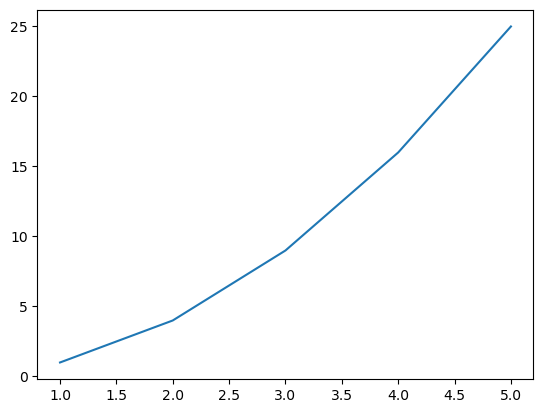

In [318]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4,5],[1,4,9,16,25])
print("Parabole:")

En option, on peut définir une couleur et une forme avec une chaine en 3e argument ("r" pour red, "o" pour un point)

Parabole


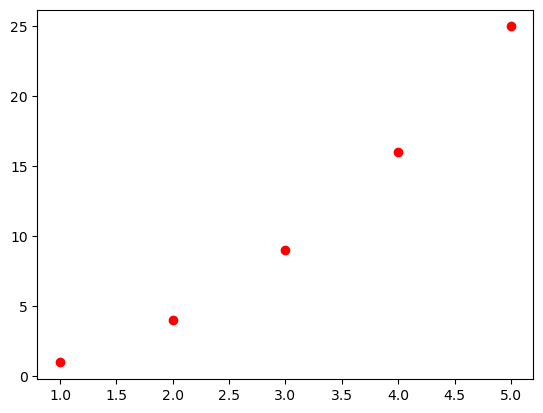

In [319]:
plt.plot([1,2,3,4,5],[1,4,9,16,25],"ro")
print("Parabole")

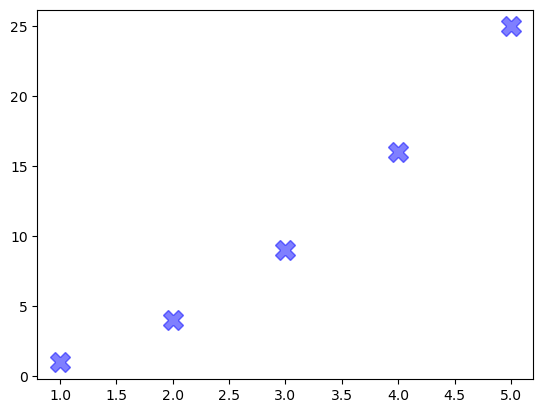

In [320]:
#quelques variantes
plt.plot([1,2,3,4,5],[1,4,9,16,25],"bX",markersize=15,alpha=0.5)
print()

Pour contrôler un peu l'affichage, on peut fixer les extrémités des axes, et les forcer à être à la même échelle

Parabole encore


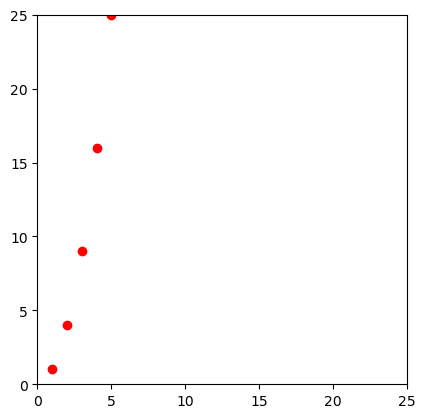

In [321]:
plt.axes().set_aspect('equal')
plt.xlim(0,25)
plt.ylim(0,25)

plt.plot([1,2,3,4,5],[1,4,9,16,25],"ro")
print("Parabole encore")

### Première partie: classification 

Passons maintenant aux choses sérieuses. On va considérer que l'on a des données de deux types différents (appelons les "rouge" et "bleu"), caractérisées par deux valeurs entre 0 et 1. 
On pourrait alors avoir une visualisation comme ceci: 

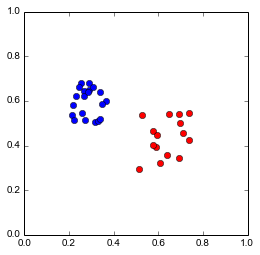

In [322]:
Image(filename="TP/blobs2.png")

Le but de ce TP est de définir un moyen de "classer" une nouvelle donnée pour dire si elle est plutôt de la classe bleue ou rouge. 
Pour cela, un moyen simple (voire simplet, mais vous creuserez la question au 2e semestre), est de calculer le barycentre
(centre de gravité) des points de chaque classe, ici en jaune: 

<img src="TP/blobs2_centres.png">

Puis de considérer leur médiatrice: 

<img src="TP/blobs2_separateur.png">

En enfin de considérer que tout ce qui est du même côté que le groupe bleu/rouge doit être bleu/rouge:

<img src="TP/classif_barycentre.png">

Evidemment, ça ne marchera pas pour tout type de données: 

<img src="TP/classif_ouch.png">

Cette méthode nécessite que les données soit séparables linéairement. Mais passons. 
Votre tâche: 

1. en utilisant la fonction random.random(), faire une fonction qui génère un "nuage" de n points autour d'une position donnée ($x_0$,$y_0$), avec un étalage réglable (distance maxi par rapport à la position donnée). Par exemple, la figure initiale a été générée avec les paramètres (vous être libre du nom de la fonction):
     > g1 = blob(0.3,0.6,20,scale=0.1)
     
     > g2 = blob(0.6,0.4,15,scale=0.15) 
 
     La fonction renvoie juste les coordonnées. 
     
     Ecrivez aussi une fonction qui prend la sortie de "blob" et fait la figure du nuage en utilisant plt.plot
 
2. Ecrivez une fonction qui détermine le centre d'un groupe
 

In [323]:
from random import random
from math import cos, sin, pi

import matplotlib.pyplot as plt
from numpy import mean

# Définition des types utilisés lors de ce TP
Point = tuple[int, int]
Vec = tuple[int, int]
Blob = list[Point]


# Génère un nuage de points en générant chaque point avec des coordonnées polaires aléatoires.
def blob(center: Point, num_points: int, max_distance: int) -> Blob:
    def gen_point(center: Point, max_distance: int) -> Point:
        # On génère chaque point avec une approche polaire (génération des paramètres en polaire puis passage en cartésien)
        angle = random() * 2 * pi
        distance = random() * max_distance
        return (
            center[0] + cos(angle) * distance, 
            center[1] + sin(angle) * distance
        )

    return [ gen_point(center, max_distance) for _i in range(num_points)]


# Affiche un nuage de points avec la couleur désirée
def show_blob(blob: Blob, plot_options = "o"):
    x = [ i[0] for i in blob ]
    y = [ i[1] for i in blob ]
    plt.plot(x, y, plot_options)


# Calcule le centre d'un nuage de points en réalisant la moyenne sur x et sur y
def centre(blob: Blob) -> Point:
    x = [ i[0] for i in blob ]
    y = [ i[1] for i in blob ]

    return (mean(x), mean(y))


# Permet de fixer le cadre de la figure entre 0 et 1 sur les axes x et y
def plot_conf():
    plt.axes().set_aspect('equal')
    plt.xlim(0,1)
    plt.ylim(0,1)

center1: (0.3210699191742141, 0.6071076612773766)
center2: (0.5880815528482736, 0.38135615676687373)


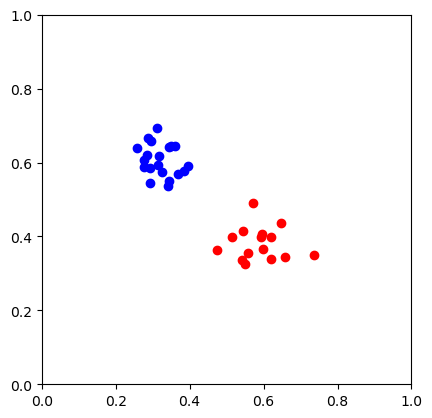

In [324]:
# On réalise une première figure avec les 2 nuages de points.
# On affiche également les coordonnées des centres pour vérifier la fonctionnalité de centre

plot_conf()

blob1 = blob((0.3, 0.6), 20, 0.1)
blob2 = blob((0.6, 0.4), 15, 0.15)

show_blob(blob1, "bo")
show_blob(blob2, "ro")

print(f"center1: {centre(blob1)}\ncenter2: {centre(blob2)}")

  Voici une fonction qui calcule le séparateur de deux groupes (la médiatrice): pour cela il suffit de renvoyer un point de la droite, par exemple le milieu M des centres des 2 groupes, et un vecteur normal à la droite $\vec{w}$ (par exemple le vecteur défini par les deux centres). La fonction suppose que la fonction "centre" a déjà été écrite, 
  et que g1, g2, c1 et c2 sont des vecteurs ou matrices numpy. Adaptez si vous avez fait différemment pour les fonctions blob et centre. 
  
La fonction qui affiche le séparateur est donnée aussi

In [325]:
def separateur(g1: Blob, g2: Blob) -> tuple[Point, Vec]:
    """renvoie le milieu du segment qui relie les centres de g1 et g2, et un vecteur directeur de la médiatrice"""
    c1 = centre(g1)
    c2 = centre(g2)

    # N'utilisant pas des structures de numpy, on redéfinit le calcul du point médian
    mx = 0.5 * (c1[0] + c2[0])
    my = 0.5 * (c1[1] + c2[1])
    
    c1x, c1y = c1
    c2x, c2y = c2

    return ((mx, my), (c1x-c2x, c1y-c2y))

    
def plot_separateur(m: Point, w: Vec, scale=3, color="y"):
    """à partir d'un point M et un vecteur directeur w, trace un segment de la droite correspondante
    (échelle/scale à ajuster selon la figure)
    """
    tw = (-w[1], w[0])
    plt.plot([m[0]+scale*tw[0],m[0]-scale*tw[0]], [m[1]+scale*tw[1],m[1]-scale*tw[1]], f"{color}-")



Ceci devrait vous aider à générer une figure similaire à celle-ci: 

<img src="TP/blobs2_separateur.png">

((0.45457573601124385, 0.49423190902212516),
 (-0.26701163367405945, 0.22575150451050285))

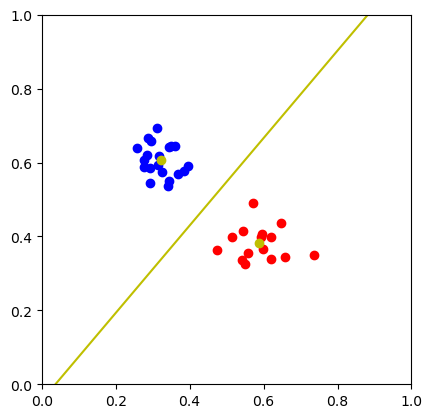

In [326]:
# On mets le code dans une fonction pour réutiliser dans la question suivante
def show_graph_and_get_separator():
    plot_conf()

    # Affichage des 2 nuages de points
    show_blob(blob1, "bo")
    show_blob(blob2, "ro")

    # Calcul et affichage des centres des nuages de points
    centre1 = centre(blob1)
    centre2 = centre(blob2)

    plt.plot(centre1[0], centre1[1], "yo")
    plt.plot(centre2[0], centre2[1], "yo")

    # Calcul et affichage du séparateur
    m, w = separateur(blob1, blob2)
    plot_separateur(m, w)

    # On retourne les données du séparateur pour les réutiliser si besoin
    return (m, w)

show_graph_and_get_separator()

  
  3. Ecrivez une fonction qui classifie un point P par rapport à cette droite: ici le critère est déterminé par rapport à l'angle entre $\vec{MP}$ et $\vec{w}$, soit $cos(\vec{MP},\vec{w})>0$ (ou inférieur), ou encore
  $\vec{MP}\cdot\vec{w}>0$ (ou inférieur).
  
  Ensuite générer des points au hasard avec des coordonnées entre 0 et 1, et afficher les comme des croix (symbole 'x') avec la couleur correspondant à la classe prédite par la fonction précédente.
  
 

In [327]:
import numpy as np

# La classification se fait en utilisant la méthode du produit scalaire
def classify(p: Point, m: Point, w: Vec) -> bool:
    # Calcul du vecteur directeur MP
    mp: Vec = (p[0] - m[0], p[1] - m[1])
    
    # On retourne vrai si le produit scalaire de MP et w est positif
    return np.dot(mp, w) > 0

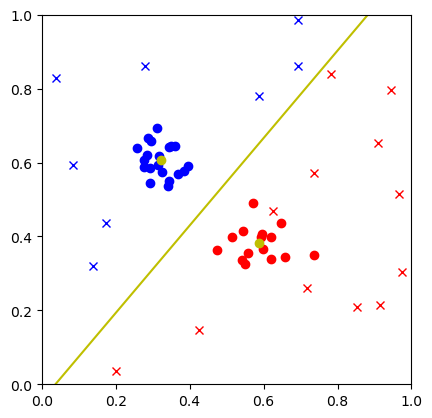

In [328]:
n = 20

m, w = show_graph_and_get_separator()
for i in range(n):
    # On génère n points aux coordonnées aléatoires et on les classifie
    x = random()
    y = random()
    color = "b" if classify((x, y), m, w) else "r"

    plt.plot(x, y, f"{color}x")

Bonus: vous pouvez essayer aussi avec des données "tordues", cf certains jeux de test de la librairie scikit-learn (et faire un peu de numpy !)

In [329]:
# from sklearn.datasets import make_moons, make_circles
# d = make_moons(noise=0.3, random_state=0)
# xy, c = d
# plt.scatter(xy[:,0],xy[:,1],c=c)

### Deuxième partie: de "vraies" données

Vous pouvez maintenant utiliser le fichier "iris.txt", en annexe du sujet. Celui-ci contient des caractéristiques de différentes fleurs de l'espèce iris, réparties en trois sous-espèces "setosa", "virginica", "versicolor". 

Vous pouvez utiliser numpy pour lire directement les données: 

In [330]:
import numpy as np
data = np.genfromtxt('iris.txt', dtype=None,delimiter=',',names=True,encoding=None)

Si on regarde le résultat, on voit que cela donne une matrice de tuples, avec les caractéristiques et la classe de chaque instance. On a aussi une liste de noms des "colonnes" de ces données: 

In [331]:
data[:4]

array([(5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
       (4.9, 3. , 1.4, 0.2, 'Iris-setosa'),
       (4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
       (4.6, 3.1, 1.5, 0.2, 'Iris-setosa')],
      dtype=[('sepal_l', '<f8'), ('sepal_w', '<f8'), ('petal_l', '<f8'), ('petal_w', '<f8'), ('classe', '<U15')])

On peut alors récupérer les colonnes par leur nom: 

In [332]:
data["classe"][:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [333]:
data["sepal_l"][:10]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9])

A vous de jouer, pour: 
    
   1. Faire une fonction qui affiche 2 caractéristiques choisies sur ces données, donnant une couleur différente à chaque groupe. Utilisez les fonctionalités de numpy. Par exemple: 
   <img src="TP/iris_test.png">

   2. Appliquer la première partie pour trouver des séparateurs des données, en considérant qu'il faut un séparateur pour chaque groupe par rapport aux deux autres ensembles (toujours restreint à deux caractéristiques).
    Trouver les 2 meilleures caractéristiques à prendre pour une bonne séparation. 
    
   3. Tester vos "modèles" en calculant les séparateurs avec un sous-ensemble aléatoire des données, et en évaluant s'ils classent correctement les données restantes. 
       
       
Et voilà, vous avez fait votre premier programme qui apprend automatiquement ...

In [334]:
from enum import Enum
import matplotlib.pyplot as plt

# Enum pour choisir selon quels paramètres on souhaite afficher nos données
class ClassificationType(Enum):
    SEPAL = 0
    PETAL = 2

# Tableau pour convertir les classes en couleurs
colors = ["r", "g", "y"]

def sort_and_display_data(data, cls_type: ClassificationType):
    # On reorganize les données sous le format (x, y, classe) avec x/y = sepal_w/l ou petal_w/l en fonction du cls_type choisi
    new_data = [ (data[i][cls_type.value], data[i][cls_type.value + 1], data[i][4]) for i in range(len(data)) ]

    # On groupe les points en fonction de leur classe
    blobs: dict[str, Blob] = {}

    categories: list[str] = list(np.unique(data["classe"]))
    for category in categories:
        # On filtre la liste pour conserver les entrées avec la classe désirée puis on les convertit en un nuage de points (x,y)
        blobs[category] = [(el[0], el[1]) for el in filter(lambda x: x[2] == category, new_data)]

        # On obtient une couleur unique pour le nuage de points
        blob_color = colors[categories.index(category)]

        # Affichage du nuage de points
        show_blob(blobs[category], f"{blob_color}o")
    
    return blobs

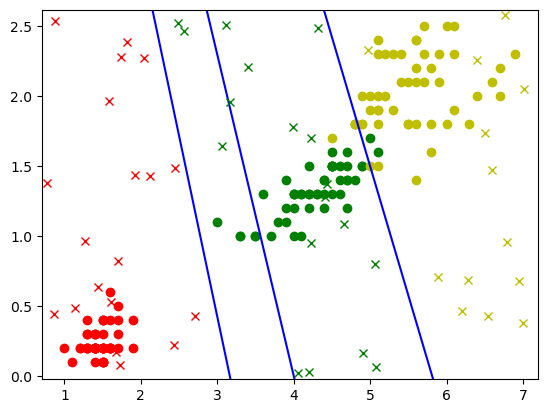

In [427]:
import numpy as np
data = np.genfromtxt('iris.txt', dtype=None, delimiter=',', names=True, encoding=None)

"""
Choix de l'affichage:
- PETAL pour les dimensions des pétales
- SEPAL pour les dimensions des sépales
"""
cls_type = ClassificationType.PETAL
nb_test_points = 50

# Question 1
# =================================================================

blobs_tagged = sort_and_display_data(data, cls_type)
blobs = list(blobs_tagged.values())

# Question 2
# =================================================================

def show_sep(i1, i2):
    m, w = separateur(blobs[i1], blobs[i2])
    plot_separateur(m, w, scale=3, color="b")
    return m, w


# On empeche le graphe de changer de dimensions
xl, xr = plt.xlim()
yl, yr = plt.ylim()
plt.xlim(xl, xr)
plt.ylim(yl, yr)

# On calcule et on affiche les séparateurs entre chaque nuage de points
m_rg, w_rg = show_sep(0, 1)
m_gy, w_gy = show_sep(1, 2)
m_ry, w_ry = show_sep(2, 0)

# Question 3
# =================================================================

def rand(min: float, max: float) -> float:
    return random() * (max - min) + min

for i in range(nb_test_points):
    x = rand(xl, xr)
    y = rand(yl, yr)
    p: Point = (x, y)

    # On récupère la classification selon chaque séparateur
    is_r_not_g = classify(p, m_rg, w_rg)
    is_g_not_y = classify(p, m_gy, w_gy)
    is_y_not_r = classify(p, m_ry, w_ry)

    # Puis on combine
    is_r = is_r_not_g or not is_y_not_r
    is_g = is_g_not_y and not is_r_not_g
    is_y = is_y_not_r or not is_g_not_y

    # On en déduis la couleur (dépend de l'ordre des conditions)
    color = "g" if is_g else ("r" if is_r else ("y" if is_y else "b"))
    plt.plot(x, y, f"{color}x")

    """
        Conclusion : 
        
        Individuellement nos modèles permettent de déterminer avec une bonne confiance si un point est d'une couleur ou non.
        Cependant, lorsque l'on mets les 3 filtres en commun la détection est amenuie étant donné que plusieurs zones de détection se superposent (rouge et vert, vert et jaune)
        La classification dépendra alors de l'ordre arbitraire des conditions ce qui réduit l'objectivité de la classification
    """